# Activation Functions
An Activation Function decides whether a neuron should be activated or not. This means that it will decide whether the neuron’s input to the network is important or not in the process of prediction using simpler mathematical operations. 

## Importing required libs

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import random

## 3 Types of Neural Networks Activation Functions

### Binary Step Function


Binary step function depends on a threshold value that decides whether a neuron should be activated or not. 

The input fed to the activation function is compared to a certain threshold; if the input is greater than it, then the neuron is activated, else it is deactivated, meaning that its output is not passed on to the next hidden layer.

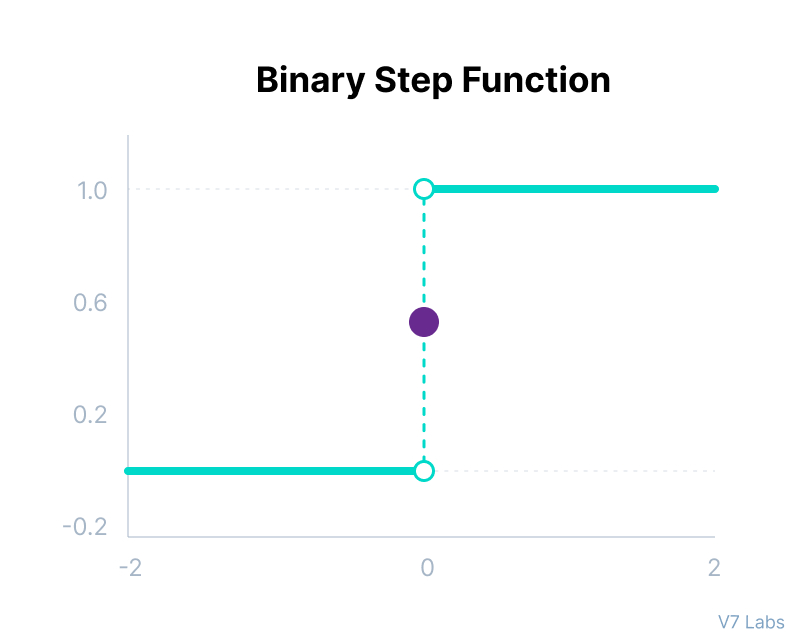

*Mathmatically*

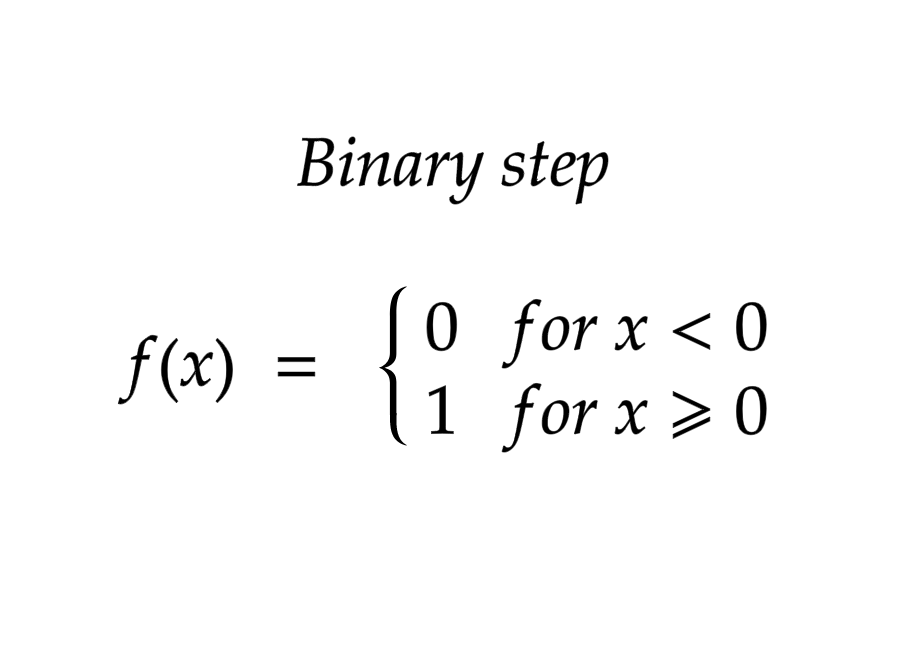

*Here are some of the limitations of binary step function:*

It cannot provide multi-value outputs—for example, it cannot be used for multi-class classification problems. 
The gradient of the step function is zero, which causes a hindrance in the backpropagation process.

### Linear Activation Function

The linear activation function, also known as "no activation," or "identity function" (multiplied x1.0), is where the activation is proportional to the input.

The function doesn't do anything to the weighted sum of the input, it simply spits out the value it was given.

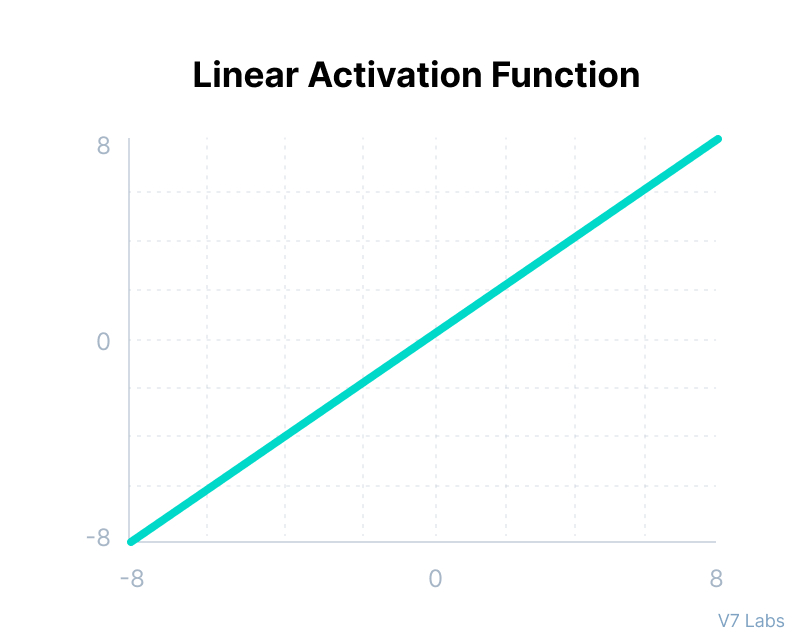

Mathematically it can be represented as:

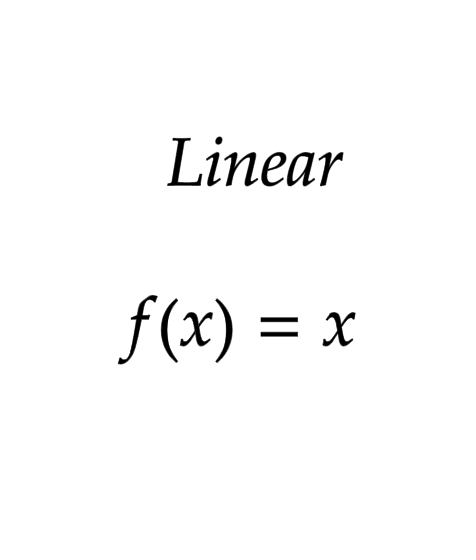

However, a linear activation function has two major problems :

- It’s not possible to use backpropagation as the derivative of the function is a constant and has no relation to the input x. 
- All layers of the neural network will collapse into one if a linear activation function is used. No matter the number of layers in the neural network, the last layer will still be a linear function of the first layer. So, essentially, a linear activation function turns the neural network into just one layer.


### Non-Linear Activation Functions

The linear activation function shown above is simply a linear regression model. 

Because of its limited power, this does not allow the model to create complex mappings between the network’s inputs and outputs. 

Non-linear activation functions solve the following limitations of linear activation functions:

- They allow backpropagation because now the derivative function would be related to the input, and it’s possible to go back and understand which weights in the input neurons can provide a better prediction.

- They allow the stacking of multiple layers of neurons as the output would now be a non-linear combination of input passed through multiple layers. Any output can be represented as a functional computation in a neural network.

#### Sigmoid/Logistic activation function

This function takes any real value as input and outputs values in the range of 0 to 1. 

The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0, as shown below.

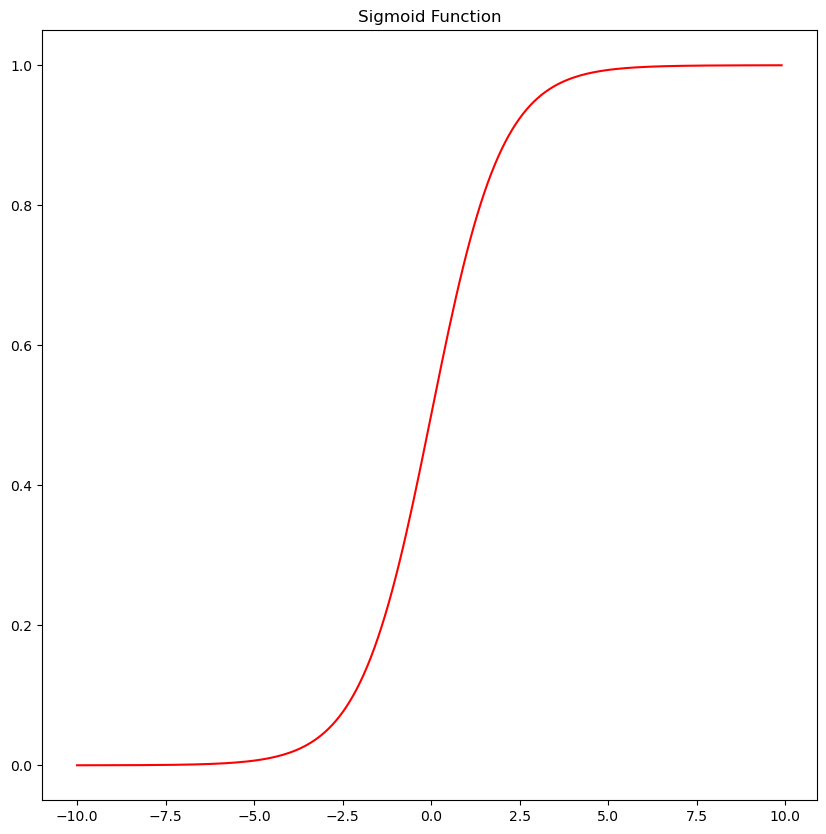

In [93]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

test_data = np.arange(-10, 10, 0.1)

plt.figure(figsize=(10,10))
plt.title('Sigmoid Function')
plt.plot(test_data, sigmoid(test_data), 'r')
plt.show()


Here’s why sigmoid/logistic activation function is one of the most widely used functions:

- It is commonly used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice because of its range.

- The function is differentiable and provides a smooth gradient, i.e., preventing jumps in output values. This is represented by an S-shape of the sigmoid activation function.

##### The limitations of sigmoid function are discussed below:

- The derivative of the function is f'(x) = sigmoid(x)*(1-sigmoid(x)). 



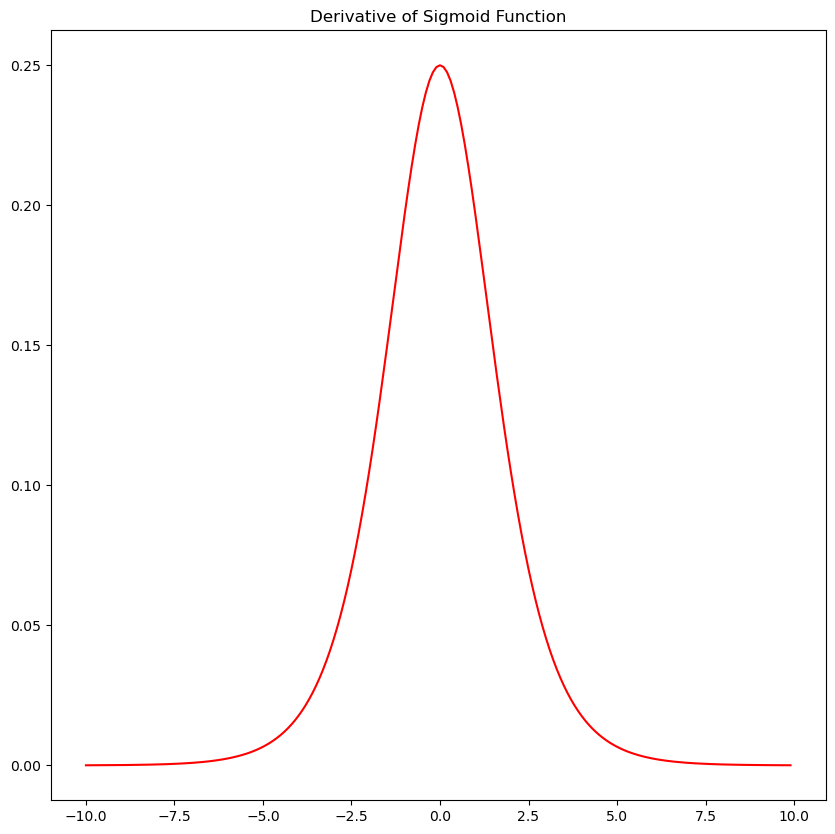

In [94]:
test_data = np.arange(-10, 10, 0.1)

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

plt.figure(figsize=(10,10))
plt.title('Derivative of Sigmoid Function')
plt.plot(test_data, derivative_sigmoid(test_data), 'r')
plt.show()

It implies that for values greater than 3 or less than -3, the function will have very small gradients. As the gradient value approaches zero, the network ceases to learn and suffers from the Vanishing gradient problem.
- The output of the logistic function is not symmetric around zero. So the output of all the neurons will be of the same sign. This makes the training of the neural network more difficult and unstable.

### Tanh Function (Hyperbolic Tangent)

Tanh function is very similar to the sigmoid/logistic activation function, and even has the same S-shape with the difference in output range of -1 to 1. In Tanh, 
- the larger the input (more positive), the closer the output value will be to 1.0, 
- whereas the smaller the input (more negative), the closer the output will be to -1.0.

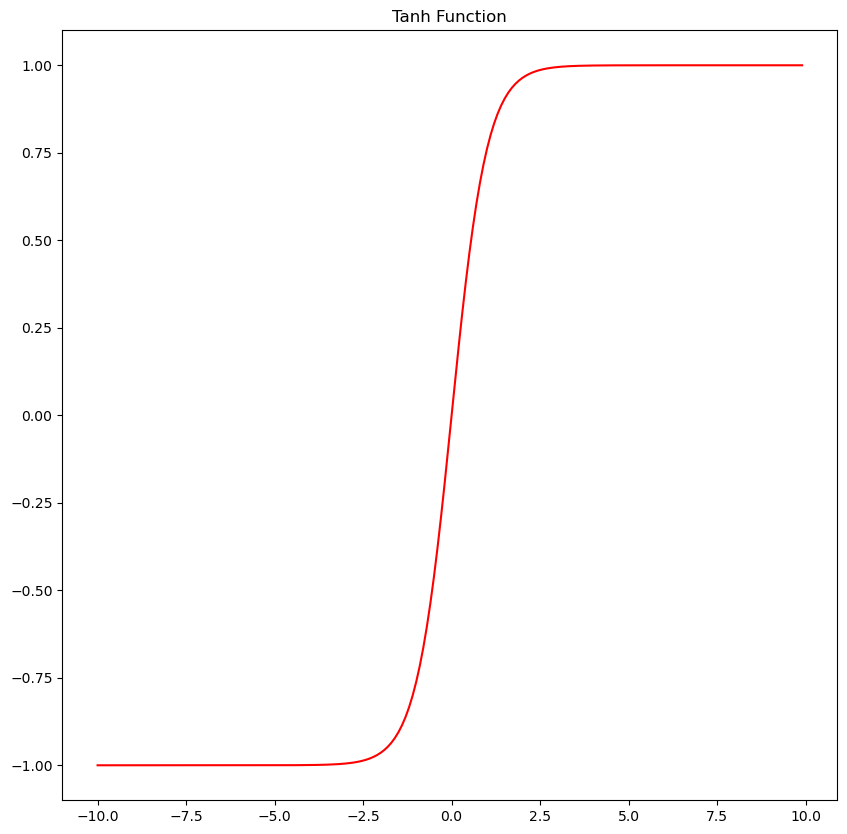

In [95]:
test_data = np.arange(-10, 10, 0.1)

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

plt.figure(figsize=(10,10))
plt.title('Tanh Function')
plt.plot(test_data, tanh(test_data), 'r')
plt.show()


##### Advantage of using this activation function

- The output of the tanh activation function is Zero centered; hence we can easily map the output values as strongly negative, neutral, or strongly positive.

- Usually used in hidden layers of a neural network as its values lie between -1 to; therefore, the mean for the hidden layer comes out to be 0 or very close to it. It helps in centering the data and makes learning for the next layer much easier.


Have a look at the gradient of the tanh activation function to understand its limitations.


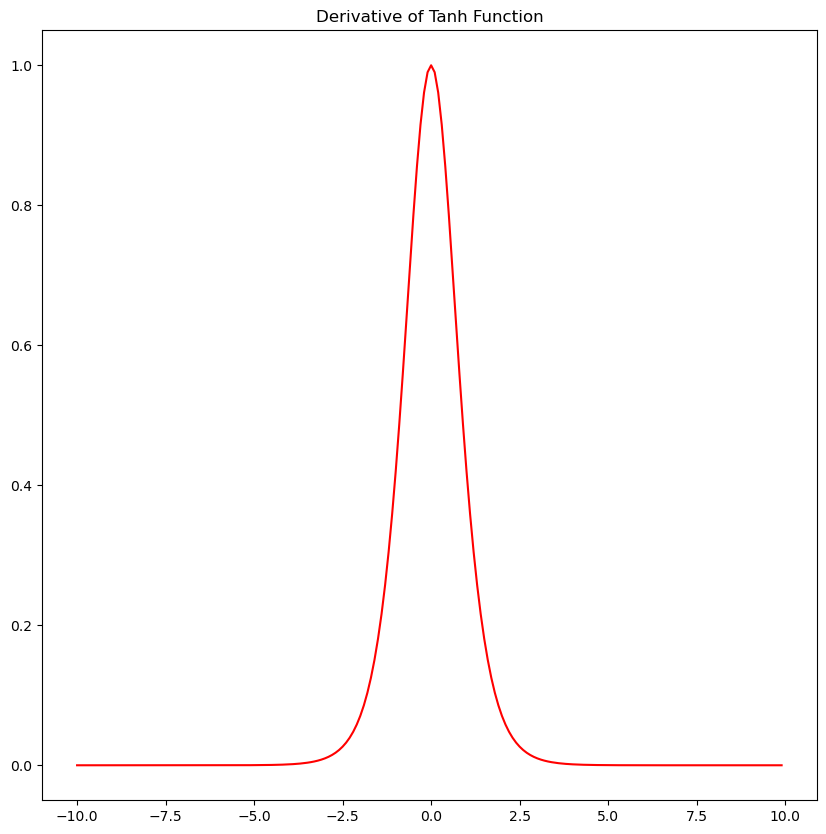

In [96]:
def tanh_derivative(x):
    return 1 - tanh(x)**2


plt.figure(figsize=(10,10))
plt.title('Derivative of Tanh Function')
plt.plot(test_data, tanh_derivative(test_data), 'r')
plt.show()

As you can see— it also faces the problem of *vanishing gradients* similar to the sigmoid activation function. 
- Plus the gradient of the tanh function is much steeper as compared to the sigmoid function.

### ReLU Function

*ReLU stands for Rectified Linear Unit.*

Although it gives an impression of a linear function, ReLU has a derivative function and allows for backpropagation while simultaneously making it computationally efficient. 

- The main catch here is that the ReLU function does not activate all the neurons at the same time. 

- The neurons will only be deactivated if the output of the linear transformation is less than 0.



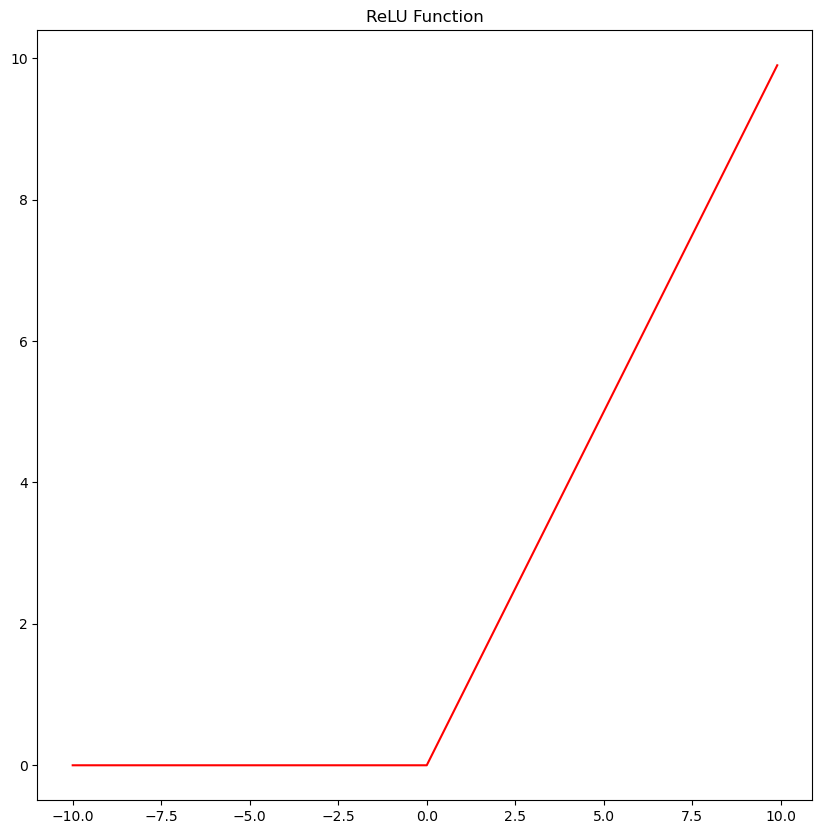

In [97]:
def relu(x):
    return np.maximum(0, x)

plt.figure(figsize=(10,10))
plt.title('ReLU Function')
plt.plot(test_data, relu(test_data), 'r')
plt.show()

| Advantage | Disadvantage |
|-----------|--------------|
|Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh functions. | The negative side of the graph makes the gradient value zero. Due to this reason, during the backpropagation process, the weights and biases for some neurons are not updated. This can create dead neurons which never get activated.  |
|ReLU accelerates the convergence of gradient descent towards the global minimum of the loss function due to its linear, non-saturating property. |  All the negative input values become zero immediately, which decreases the model’s ability to fit or train from the data properly.  |

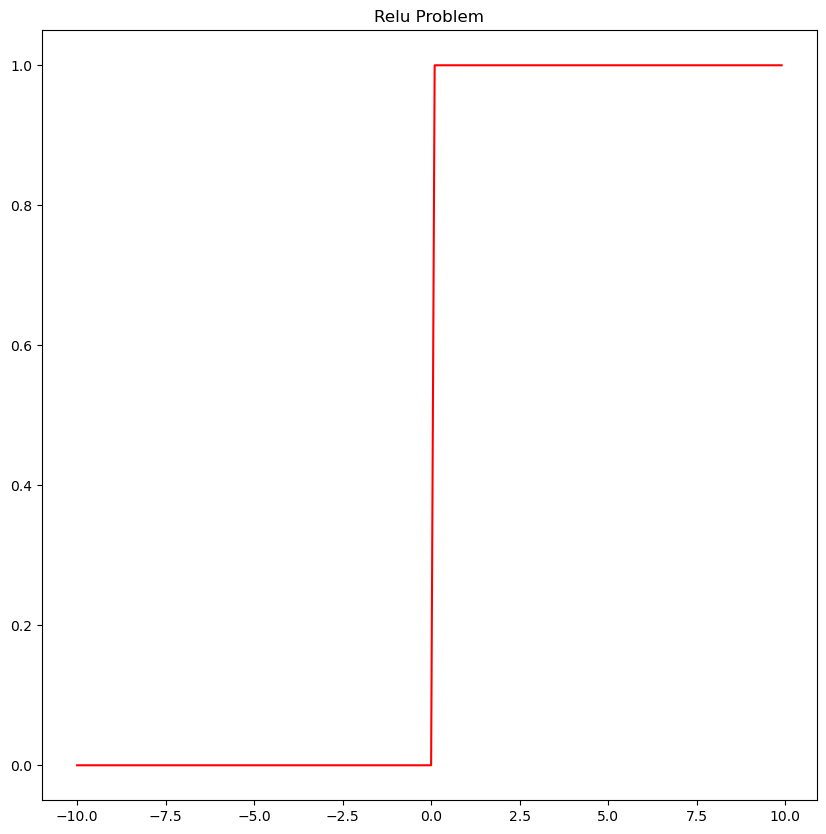

In [98]:
plt.figure(figsize=(10,10))
plt.title('Relu Problem')
plt.plot(test_data, np.where(test_data > 0, 1, 0), 'r')
plt.show()

### Leaky ReLU Function

Leaky ReLU is an improved version of ReLU function to solve the Dying ReLU problem as it has a small positive slope in the negative area.




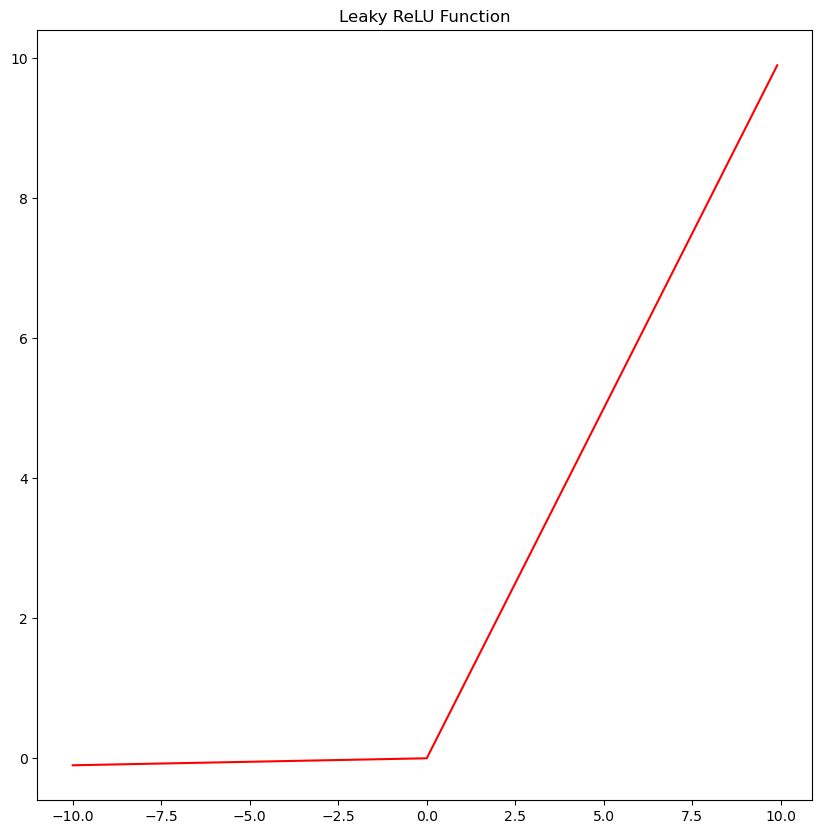

In [99]:
def leaky_relu(x):
    return np.maximum(0.01*x, x)

plt.figure(figsize=(10,10))
plt.title('Leaky ReLU Function')
plt.plot(test_data, leaky_relu(test_data), 'r')
plt.show()


| Advantage | Disadvantage |
|-----------|--------------|
| The advantages of Leaky ReLU are same as that of ReLU, in addition to the fact that it does enable backpropagation, even for negative input values.  | The predictions may not be consistent for negative input values.  |
|By making this minor modification for negative input values, the gradient of the left side of the graph comes out to be a non-zero value. Therefore, we would no longer encounter dead neurons in that region.  | The gradient for negative values is a small value that makes the learning of model parameters time-consuming.|

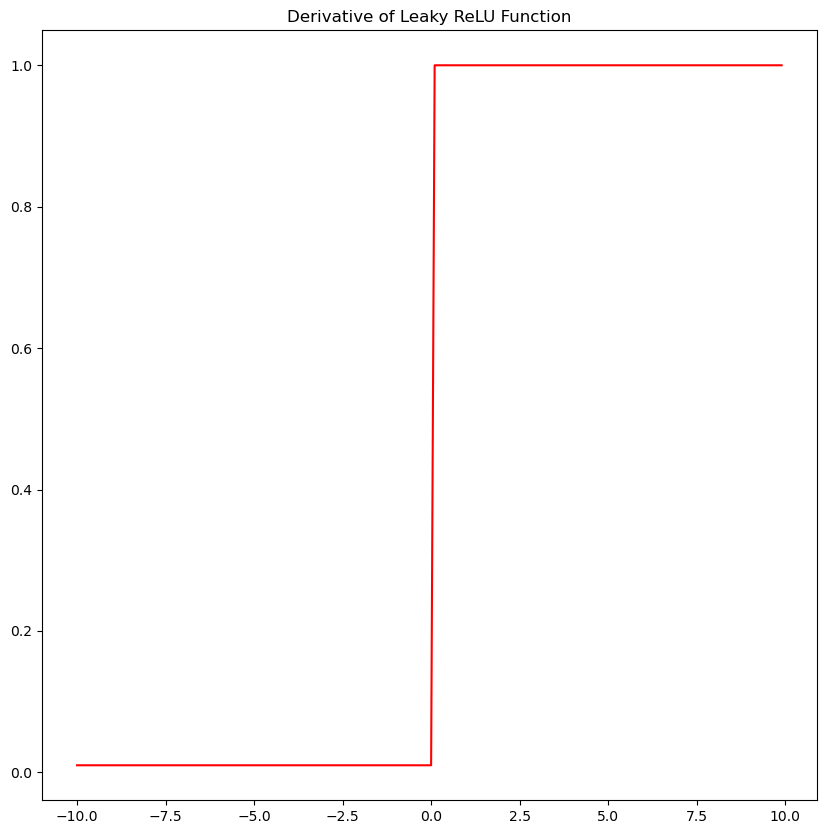

In [100]:
def leaky_relu_derivative(x):
    return np.where(x > 0, 1, 0.01)

plt.figure(figsize=(10,10))
plt.title('Derivative of Leaky ReLU Function')
plt.plot(test_data, leaky_relu_derivative(test_data), 'r')
plt.show()

### Parametric ReLU Function

Parametric ReLU is another variant of ReLU that aims to solve the problem of gradient’s becoming zero for the left half of the axis. 


This function provides the slope of the negative part of the function as an argument a. By performing backpropagation, the most appropriate value of a is learnt.



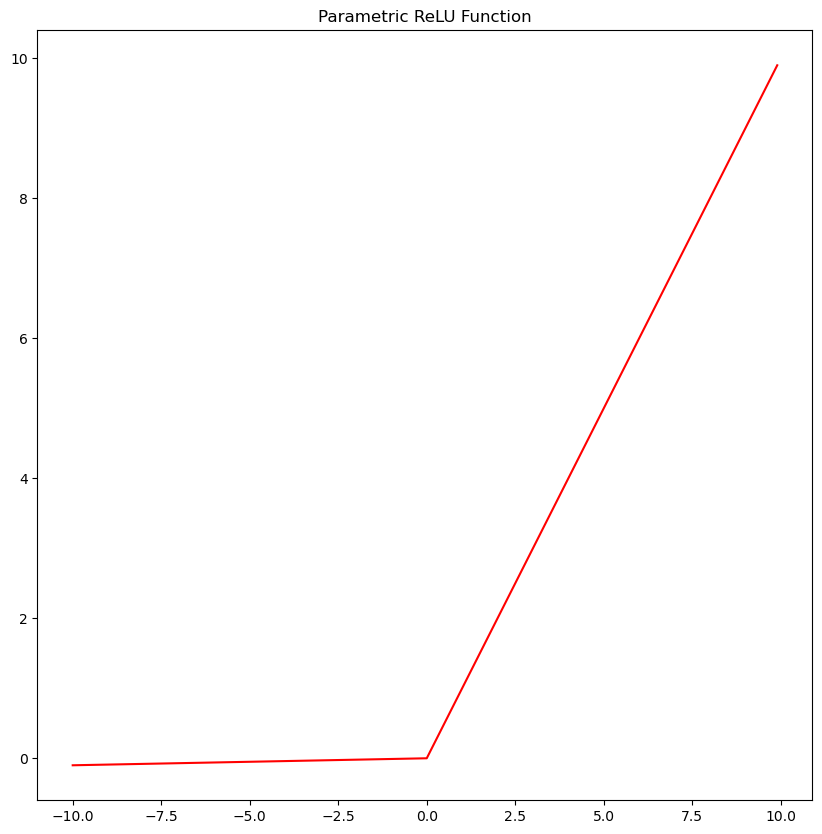

In [101]:
def parametric_relu(x, alpha=0.01):
    return np.maximum(alpha*x, x)

plt.figure(figsize=(10,10))
plt.title('Parametric ReLU Function')
plt.plot(test_data, parametric_relu(test_data), 'r')
plt.show()


| Advantage | Disadvantage |
| ----------|--------------|
| The parameterized ReLU function is used when the leaky ReLU function still fails at solving the problem of dead neurons, and the relevant information is not successfully passed to the next layer.  | This function’s limitation is that it may perform differently for different problems depending upon the value of slope parameter a. |

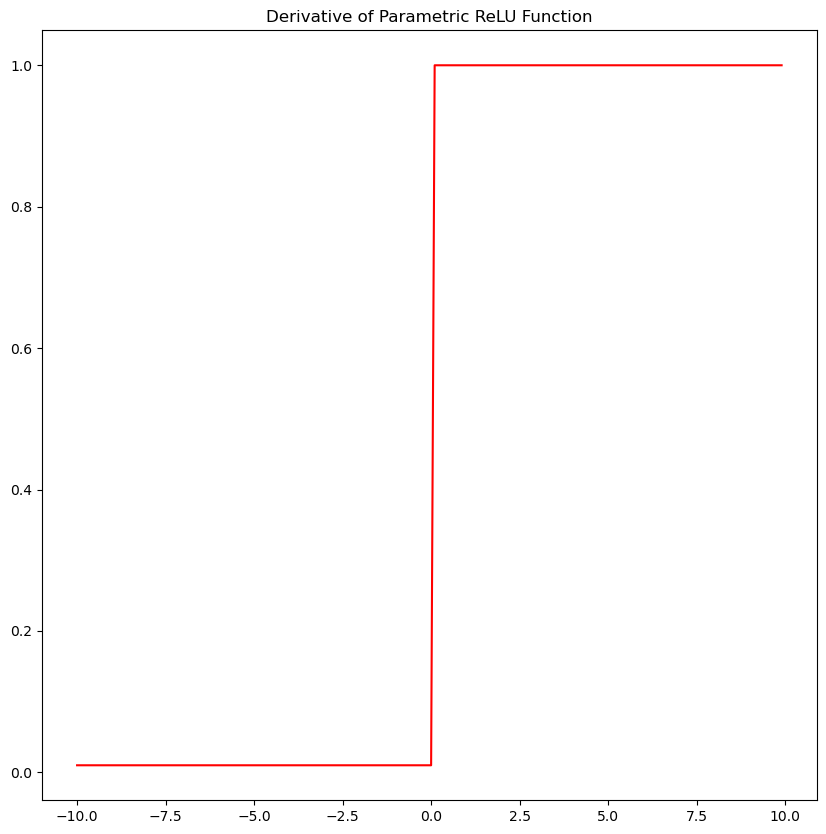

In [102]:
def parametric_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

plt.figure(figsize=(10,10))
plt.title('Derivative of Parametric ReLU Function')
plt.plot(test_data, parametric_relu_derivative(test_data), 'r')
plt.show()

### Exponential Linear Units (ELUs) Function

Exponential Linear Unit, or ELU for short, is also a variant of ReLU that modifies the slope of the negative part of the function. 



ELU uses a log curve to define the negativ values unlike the leaky ReLU and Parametric ReLU functions with a straight line.

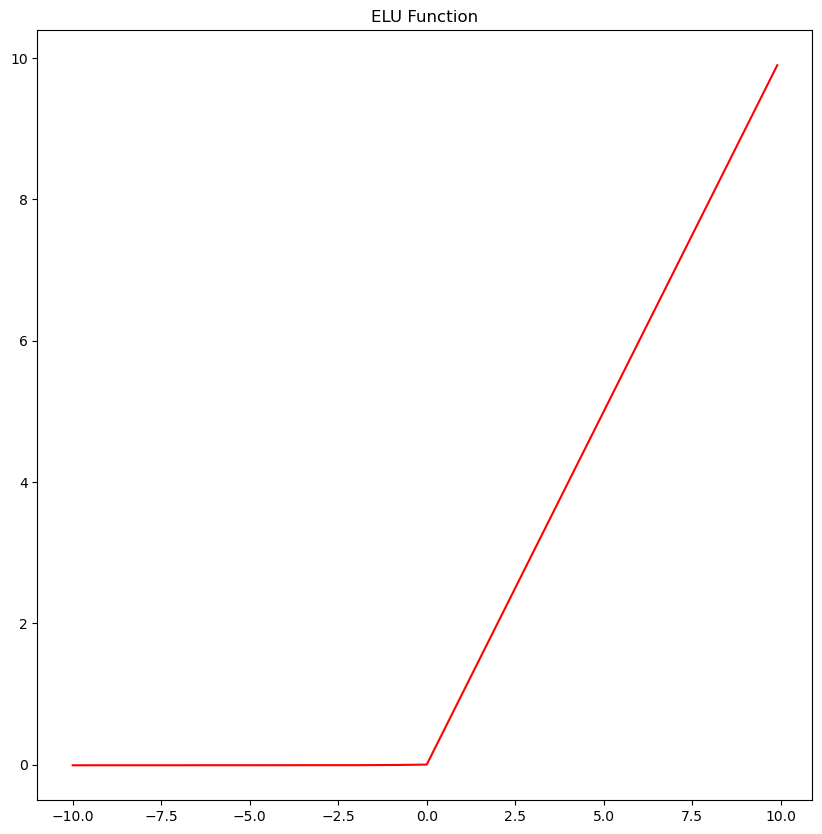

In [103]:
def elu(x, alpha=0.01):
    return np.where(x > 0, x, alpha*(np.exp(x)-1))

plt.figure(figsize=(10,10))
plt.title('ELU Function')
plt.plot(test_data, elu(test_data), 'r')
plt.show()